In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def draw_results(results, title):
    nonzero_subset = results[results.decoys_vs_clean > 0]
    
    fig, ax = plt.subplots()
    
    ### Draw the cases with decoys as a function of the proportion of decoys to clean images
    fig = sns.lineplot(
        data=nonzero_subset, x="decoys_vs_clean", y="recall", style="epsilon", markers=True, ax=ax)

    ### Draw the epsilon=0.0/no decoys case as a straight line with a confidence interval
    # determine the range of the x axis (decoys_vs_clean), for the matplotlib plot function
    min_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.min())
    max_decoys_vs_clean = int(nonzero_subset.decoys_vs_clean.max())
    x_range = range(min_decoys_vs_clean, max_decoys_vs_clean + 1)
    
    # determine the mean recall of the epsilon = 0.0 subset
    mean_clean_recall = np.mean(results[results.decoys_vs_clean <= 0.0]["recall"])
    # repeat it for the x range so that it gets drawn as a straight line
    y_mean = [mean_clean_recall for _ in x_range]
    
    # determine the 95% confidence interval
    std_clean_recall = np.std(results[results.decoys_vs_clean <= 0.0]["recall"])
    n_clean_recall = len(results[results.decoys_vs_clean <= 0.0]["recall"])
    confidence_bound = 1.96 * (std_clean_recall/np.sqrt(n_clean_recall))

    # fill the confidence interval for the range
    fig.plot(
        x_range,
        y_mean,
        color='r'
    )
    fig.fill_between(
        x_range,
        (y_mean - confidence_bound), 
        (y_mean + confidence_bound), 
        color='r',
        alpha=.1
    )
    fig.set_title(title)

def get_path(network_to_evaluate, attack_name, k=1):
    return "/home/ivan/pascal_adversarial_faces/results/recall_at_{k}_{attack_name}_{network_to_evaluate}.csv".format(
        network_to_evaluate=network_to_evaluate,
        attack_name=attack_name,
        k=k
    )

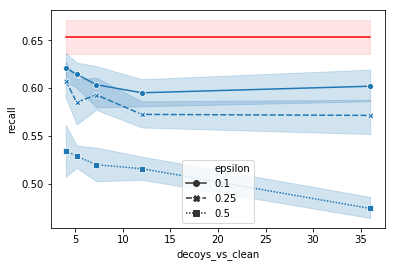

In [4]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_Conv2d_4b_3x3_vggface2")))

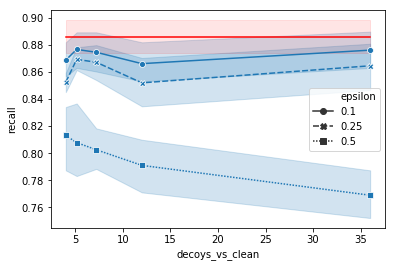

In [5]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_Conv2d_4b_3x3_vggface2")))

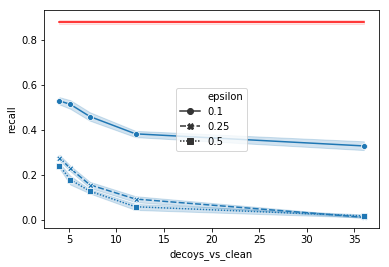

In [6]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_vggface2")))

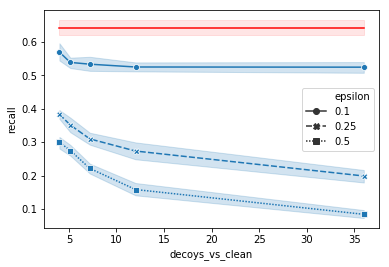

In [7]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_vggface2")))

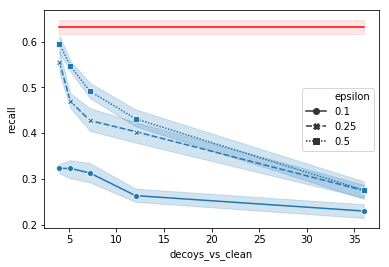

In [8]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="casia-webface", 
        attack_name="mean_casia-webface")))

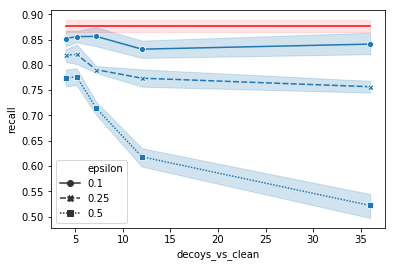

In [9]:
draw_results(
    pd.read_csv(get_path(
        network_to_evaluate="vggface2", 
        attack_name="mean_casia-webface")))

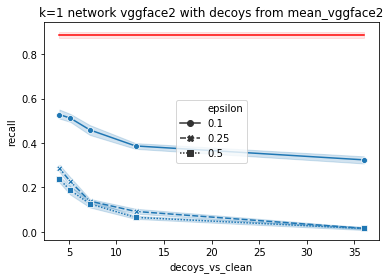

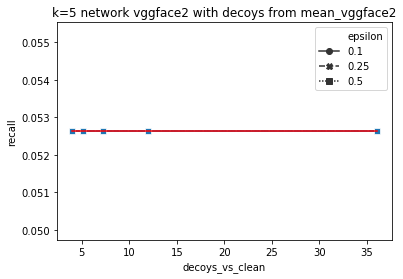

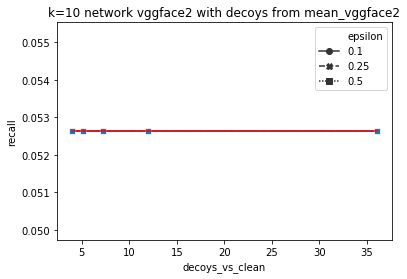

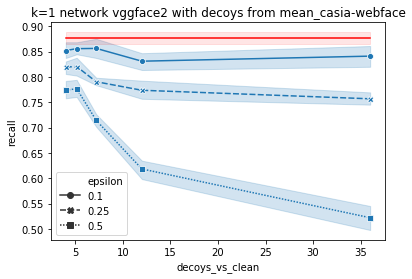

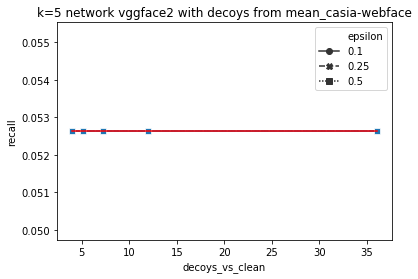

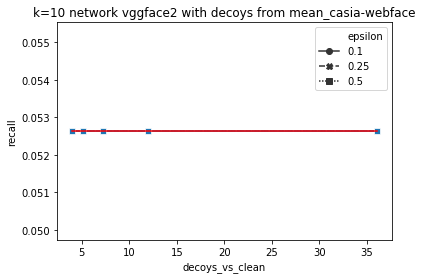

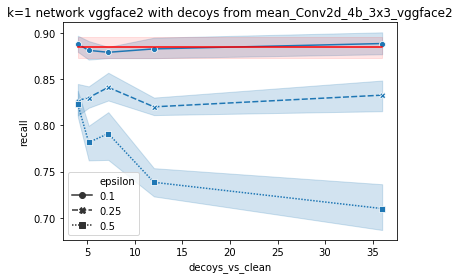

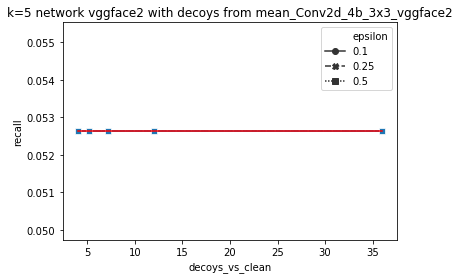

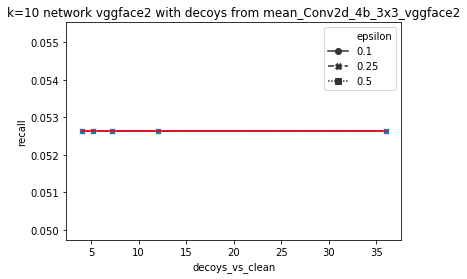

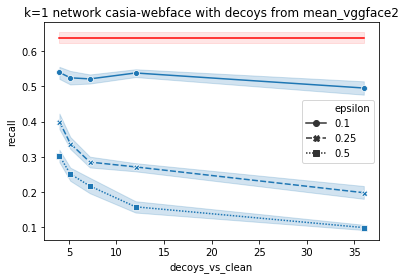

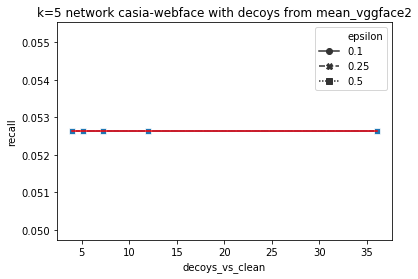

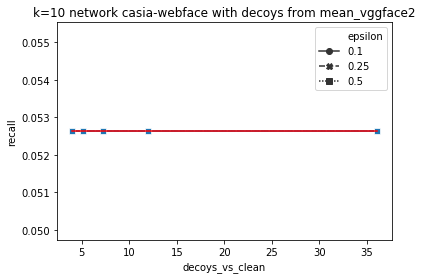

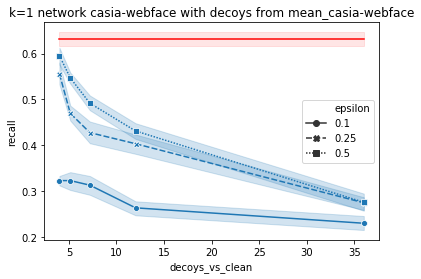

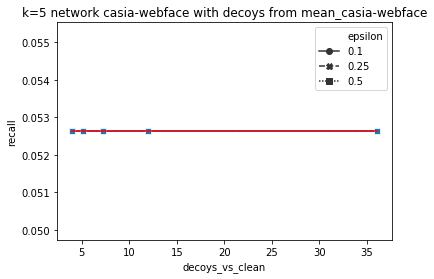

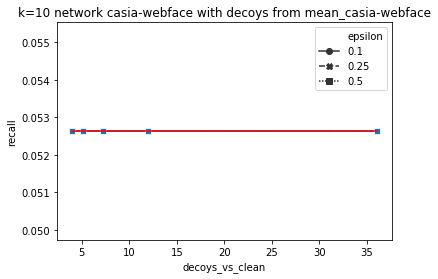

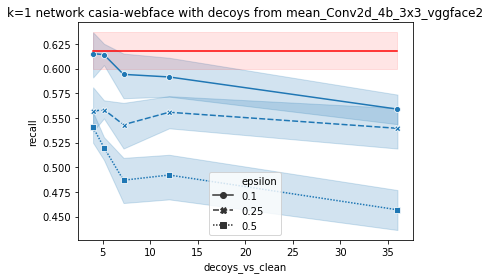

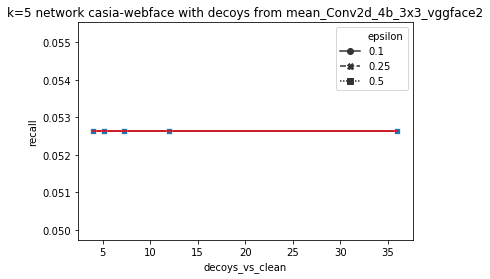

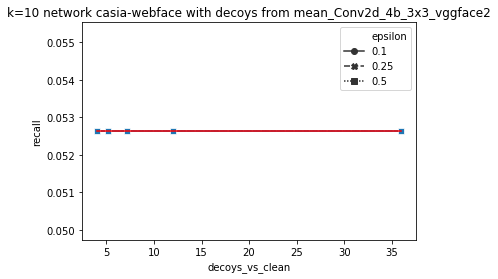

In [21]:
for network_to_evaluate in ["vggface2", "casia-webface"]:
    for attack in ["mean_vggface2", "mean_casia-webface", "mean_Conv2d_4b_3x3_vggface2"]:
        for k in [1, 5, 10]:
            draw_results(
                pd.read_csv(get_path(
                    network_to_evaluate=network_to_evaluate, 
                    attack_name=attack,
                    k=k
                )),
                "k={k} network {network} with decoys from {attack}".format(
                    k=k, network=network_to_evaluate, attack=attack)
            )

In [4]:
df = pd.read_csv("/home/ivan/pascal_adversarial_faces/results/azure_recall_mean_vggface2.csv")

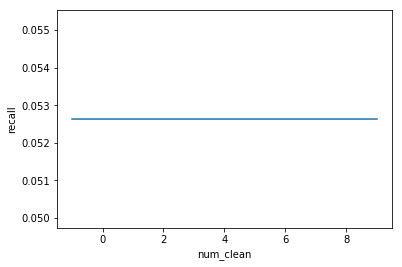

In [28]:
sns.lineplot(data=df, x="num_clean", y="recall", markers=True)

In [5]:
df.recall.describe()

count    6.000000
mean     0.493678
std      0.202063
min      0.206522
25%      0.370560
50%      0.505495
75%      0.657273
max      0.711111
Name: recall, dtype: float64